In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# ガウス正規分布式
def p(x, mean, sd):
    #ガウス分布の公式
    y = (1 / np.sqrt(2 * np.pi * sd ** 2 ) ) * np.exp(-(x - mean) ** 2 / (2 * sd ** 2))
    return y

# データの中における最大値と最小値を使って正規化する
def minmaxNormalized(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result

# 標準化
def zscore(x, axis = None):
    xmean = x.mean(axis=axis, keepdims=True)
    xstd  = np.std(x, axis=axis, keepdims=True)
    zscore = (x-xmean)/xstd
    return zscore


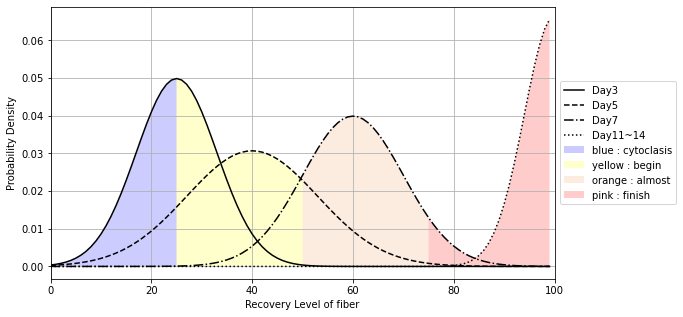

In [40]:
#main
np.random.seed(202103)
sigma = [8.0, 13.0, 10.0, 6.0] #シグマの値
mean = [25, 40, 60, 100] #μの値
labels = [
    ["Day3","Day5","Day7","Day11~14"],
    ["blue : cytoclasis", "yellow : begin", "orange : almost", "pink : finish"]
]
x_min, x_max, x_step = 0, 100, 1
color = ["Blue","Yellow", "sandybrown","Red"]
style = ["solid",  "dashed", "dashdot", "dotted"]
q = [0,25,50,75,100]


# ガウス分布グラフ描画比較
x = np.arange(x_min, x_max, x_step)
plt.figure(figsize=(8,5))    #画像の出力サイズを調整

for i in range(len(mean)):
    # 式でグラフ描画
    globals()["y" + str(i)] = p(x, mean[i], sigma[i]) 
    plt.plot(x, globals()["y" + str(i)], linestyle=style[i], label=labels[0][i], color="black")  # 日付のラベル

    if i == 0:
        plt.fill_between(x, 0, globals()["y" + str(i)],
                        where=(q[i+1] >= x) & (x >= q[i]),
                        facecolor=color[i],
                        alpha=0.2,
                        label=labels[1][i])  # 色のラベル
    else:
        globals()["y" + str(i-1)] = p(x, mean[i-1], sigma[i-1])
        y = np.maximum(globals()["y" + str(i-1)], globals()["y" + str(i)])
        plt.fill_between(x, 0, y,
                        where=(q[i+1] >= x) & (x >= q[i]),
                        facecolor=color[i],
                        alpha=0.2,
                        label=labels[1][i])  # 色のラベル

plt.xlim([x_min, x_max])
plt.grid()
plt.xlabel('Recovery Level of fiber')
plt.ylabel('Probability Density')

# 凡例を外側に配置するための調整
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 凡例を左側の中央に配置
plt.subplots_adjust(right=1.0)  # 右側の余白を調整

plt.savefig('all_graph_%d.png' % (i), dpi=70)
plt.show()

面積計算

In [76]:
from scipy.integrate import quad

# Day3の正規分布パラメータ
mean_day3 = mean[0]
sigma_day3 = sigma[0]

# Day5の正規分布パラメータ
mean_day5 = mean[1]
sigma_day5 = sigma[1]

# Day7の正規分布パラメータ
mean_day7 = mean[2]
sigma_day7 = sigma[2]

# Day11からDay14までの正規分布パラメータ
mean_day11_to_14 = mean[3]
sigma_day11_to_14 = sigma[3]

# 各日付の区間を定義
intervals = [(0, 25), (25, 50), (50, 75), (75, 100)]

def integrate_range(mean, sd, interval):
    return quad(lambda x: p(x, mean, sd), interval[0], interval[1])[0]

# Day3の各区間の面積を計算
area_day3 = [integrate_range(mean_day3, sigma_day3, interval) for interval in intervals]

# Day5の各区間の面積を計算
area_day5 = [integrate_range(mean_day5, sigma_day5, interval) for interval in intervals]

# Day7の各区間の面積を計算
area_day7 = [integrate_range(mean_day7, sigma_day7, interval) for interval in intervals]

# Day11からDay14までの各区間の面積を計算
area_day11_to_14 = [integrate_range(mean_day11_to_14, sigma_day11_to_14, interval) for interval in intervals]

# 結果の表示
print("Area under the curve for Day3:")
for i, area in enumerate(area_day3):
    print(f"{intervals[i][0]}~{intervals[i][1]}: {area}")

print("\nArea under the curve for Day5:")
for i, area in enumerate(area_day5):
    print(f"{intervals[i][0]}~{intervals[i][1]}: {area}")

print("\nArea under the curve for Day7:")
for i, area in enumerate(area_day7):
    print(f"{intervals[i][0]}~{intervals[i][1]}: {area}")

print("\nArea under the curve for Day11 to Day14:")
for i, area in enumerate(area_day11_to_14):
    print(f"{intervals[i][0]}~{intervals[i][1]}: {area}")


Area under the curve for Day3:
0~25: 0.4991109747008916
25~50: 0.4991109747008916
50~75: 0.00088902509388209
75~100: 2.052263425184352e-10

Area under the curve for Day5:
0~25: 0.12323587777835229
25~50: 0.654840212178949
50~75: 0.2173301914406943
75~100: 0.0035460104318257965

Area under the curve for Day7:
0~25: 0.0002326280924478801
25~50: 0.15842262485242156
50~75: 0.7745375447996848
75~100: 0.06677553002702497

Area under the curve for Day11 to Day14:
0~25: 3.73256430009912e-36
25~50: 3.929873434851067e-17
50~75: 1.5454296882256712e-05
75~100: 0.49998454570311784


No handles with labels found to put in legend.


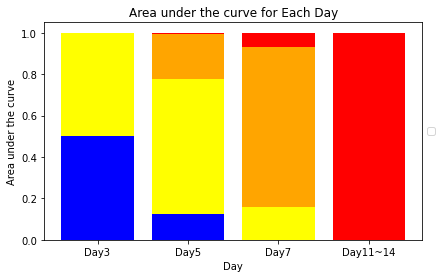

In [96]:
import matplotlib.pyplot as plt

# 色の文字列からRGB値へのマッピング
colors_mapping = {
    'Blue': (0, 0, 1),
    'Yellow': (1, 1, 0),
    'Orange': (1, 0.647, 0),
    'Red': (1, 0, 0)
}

labels = ["blue : cytoclasis", "yellow : begin", "orange : almost", "pink : finish"]

# 各日付ごとの色と面積の定義
colors = ['Blue', 'Yellow', 'Orange', 'Red']
days = ['Day3', 'Day5', 'Day7', 'Day11~14']
#areas = [area_day3, area_day5, area_day7, area_day11_to_14]

area_blue = [area_day3[0], area_day5[0], area_day7[0], area_day11_to_14[0]]
area_yellow = [area_day3[1], area_day5[1], area_day7[1], area_day11_to_14[1]]
area_orange = [area_day3[2], area_day5[2], area_day7[2], area_day11_to_14[2]]
area_pink = [area_day3[3], area_day5[3], area_day7[3], 1]
areas = [area_blue, area_yellow, area_orange, area_pink]

# グラフの描画
plt.bar(days, area_blue, color=colors_mapping['Blue'])
plt.bar(days, area_yellow, bottom=area_blue, color=colors_mapping['Yellow'])
plt.bar(days, area_orange, bottom=[a + b for a, b in zip(area_blue, area_yellow)], color=colors_mapping['Orange'])
plt.bar(days, area_pink, bottom=[a + b + c for a, b, c in zip(area_blue, area_yellow, area_orange)], color=colors_mapping['Red'])

plt.xlabel('Day')
plt.ylabel('Area under the curve')
plt.title('Area under the curve for Each Day')
#plt.tight_layout()


plt.show()


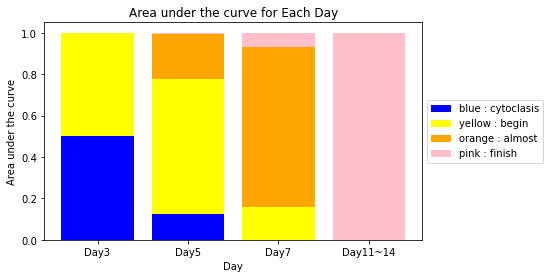

In [101]:
import matplotlib.pyplot as plt

# 色の文字列からRGB値へのマッピング
colors_mapping = {
    'Blue': (0, 0, 1),
    'Yellow': (1, 1, 0),
    'Orange': (1, 0.647, 0),
    'Red': (1, 0.753, 0.796)
}

# 各日付ごとの色と面積の定義
colors = ['Blue', 'Yellow', 'Orange', 'Red']
days = ['Day3', 'Day5', 'Day7', 'Day11~14']
# areas = [area_day3, area_day5, area_day7, area_day11_to_14]
labels = ["blue : cytoclasis", "yellow : begin", "orange : almost", "pink : finish"]

area_blue = [area_day3[0], area_day5[0], area_day7[0], area_day11_to_14[0]]
area_yellow = [area_day3[1], area_day5[1], area_day7[1], area_day11_to_14[1]]
area_orange = [area_day3[2], area_day5[2], area_day7[2], area_day11_to_14[2]]
area_pink = [area_day3[3], area_day5[3], area_day7[3], 1]
areas = [area_blue, area_yellow, area_orange, area_pink]

# グラフの描画
plt.bar(days, area_blue, color=colors_mapping['Blue'], label='blue : cytoclasis')
plt.bar(days, area_yellow, bottom=area_blue, color=colors_mapping['Yellow'], label='yellow : begin')
plt.bar(days, area_orange, bottom=[a + b for a, b in zip(area_blue, area_yellow)], color=colors_mapping['Orange'], label='orange : almost')
plt.bar(days, area_pink, bottom=[a + b + c for a, b, c in zip(area_blue, area_yellow, area_orange)], color=colors_mapping['Red'], label='pink : finish')

plt.xlabel('Day')
plt.ylabel('Area under the curve')
plt.title('Area under the curve for Each Day')

# 凡例を外側に配置するための調整
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 凡例を左側の中央に配置
plt.subplots_adjust(right=1.0)  # 右側の余白を調整

plt.show()

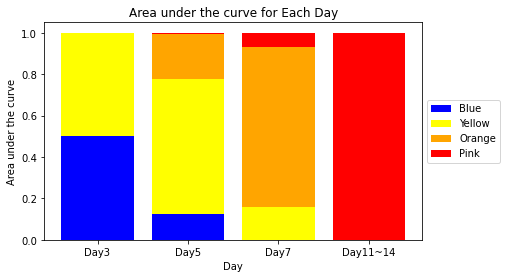

In [98]:
import matplotlib.pyplot as plt

# 色の文字列からRGB値へのマッピング
colors_mapping = {
    'Blue': (0, 0, 1),
    'Yellow': (1, 1, 0),
    'Orange': (1, 0.647, 0),
    'Red': (1, 0, 0)
}

# 各日付ごとの色と面積の定義
colors = ['Blue', 'Yellow', 'Orange', 'Red']
days = ['Day3', 'Day5', 'Day7', 'Day11~14']
# areas = [area_day3, area_day5, area_day7, area_day11_to_14]

area_blue = [area_day3[0], area_day5[0], area_day7[0], area_day11_to_14[0]]
area_yellow = [area_day3[1], area_day5[1], area_day7[1], area_day11_to_14[1]]
area_orange = [area_day3[2], area_day5[2], area_day7[2], area_day11_to_14[2]]
area_pink = [area_day3[3], area_day5[3], area_day7[3], 1]
areas = [area_blue, area_yellow, area_orange, area_pink]

# グラフの描画
plt.bar(days, area_blue, color=colors_mapping['Blue'], label='blue:')
plt.bar(days, area_yellow, bottom=area_blue, color=colors_mapping['Yellow'], label='Yellow')
plt.bar(days, area_orange, bottom=[a + b for a, b in zip(area_blue, area_yellow)], color=colors_mapping['Orange'], label='Orange')
plt.bar(days, area_pink, bottom=[a + b + c for a, b, c in zip(area_blue, area_yellow, area_orange)], color=colors_mapping['Red'], label='Pink')

plt.xlabel('Day')
plt.ylabel('Area under the curve')
plt.title('Area under the curve for Each Day')

# 凡例を外側に配置するための調整
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 凡例を左側の中央に配置
plt.subplots_adjust(right=1.0)  # 右側の余白を調整

plt.show()
